In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyplint.pyplint1D import Thimble

==== NOTE: STILL IN DEVELOPMENT STAGE ====


## Example
$$
\phi = \exp\left[i\nu\left(\frac{1}{2}(x-\mu)^2 + \frac{1}{1+x^2}\right)\right]
$$

In [3]:
def phi_lens(x, mu=0.0):
    nu = 10.0
    o = (x-mu)**2/2 + 2/(1+x**2)
    o*= 1j*nu
    return o

In [4]:
thimble = Thimble(-2, 2, delta=0.1)
thimble.set_phi(phi_lens)

In [5]:
%time thimble.find()

CPU times: user 26.8 ms, sys: 4.48 ms, total: 31.3 ms
Wall time: 32.6 ms


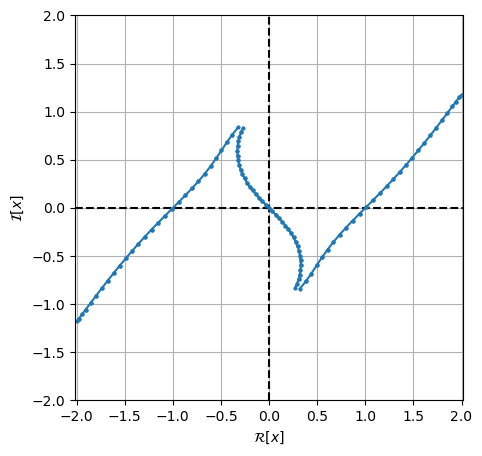

In [6]:
fig, ax = thimble.plot()

## Plotting gif

In [7]:
thimble.reset()
thimble.plot_gif('thimble-1d-example1.gif')

## Speed test

In [25]:
def phi_lens(x, mu=0.0):
    nu = 3.0
    o = (x-mu)**2/2 + 2/(1+x**2)
    o*= 1j*nu
    return o

In [26]:
thimble = Thimble(-25, 25, delta=0.25, tau=0.05, thre=-20, niter=50)

In [27]:
%%time
# Finding thimmbles for different values of mu
mus = np.linspace(-4, 4, int(2**5))
thimbles = []
for mu in mus:
    thimble.reset()
    thimble.set_phi(phi_lens, mu=mu)
    thimble.find()
    thimbles.append(thimble.copy())

CPU times: user 726 ms, sys: 13.2 ms, total: 739 ms
Wall time: 841 ms


In [28]:
%%time
# Computing the integral along the nearest thimble
mu = np.linspace(-4, 4, int(2**9))
F = []
for _mu in mu:
    idx = np.argmin(np.abs(mus-_mu))
    thimble = thimbles[idx]
    integrand = lambda x: np.exp(phi_lens(x, mu=_mu))
    _F = thimble.romberg(3, integrand)
    F.append(_F)
F = np.array(F)

CPU times: user 152 ms, sys: 4.4 ms, total: 157 ms
Wall time: 159 ms


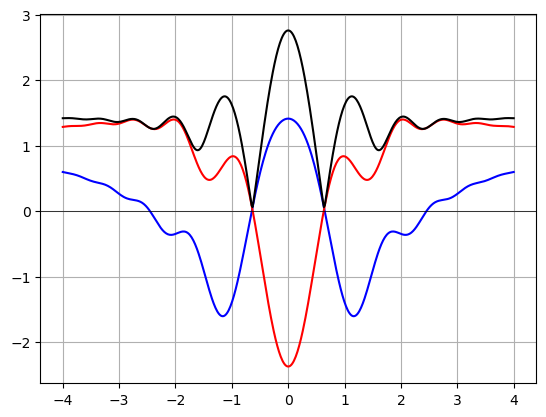

In [29]:
plt.plot(mu, np.real(F), 'b-')
plt.plot(mu, np.imag(F), 'r-')
plt.plot(mu, np.abs(F) , 'k-')
plt.grid()
plt.axhline(0, color='k', lw=0.5)
plt.show()